Running nSimplices

In [1]:
from nsimplices import *

### Run nSimplices method
feature_num = 40
dim_start = 1
dim_end = feature_num
dunn_control_matrix = np.loadtxt("datasets/dunn_control_matrix.txt")
print("dunn_control_matrix is:", dunn_control_matrix)
outlier_indices, subspace_dim, corr_dis_sq, corr_coord = \
    nsimplices(dunn_control_matrix, feature_num, dim_start, dim_end)

print("subspace dimension is:", subspace_dim)

dunn_control_matrix is: [[0.         0.64824496 0.81837053 ... 0.99860796 0.97071168 0.87376201]
 [0.64824496 0.         0.73575986 ... 0.860406   0.94290662 0.9254851 ]
 [0.81837053 0.73575986 0.         ... 0.99023615 1.09410381 1.09844986]
 ...
 [0.99860796 0.860406   0.99023615 ... 0.         1.23771934 1.15864755]
 [0.97071168 0.94290662 1.09410381 ... 1.23771934 0.         1.15992269]
 [0.87376201 0.9254851  1.09844986 ... 1.15864755 1.15992269 0.        ]]
med_height is: [0.62521705 0.59318397 0.57520489 0.56464145 0.5557683  0.5491625
 0.54287812 0.53847516 0.5367383  0.52801454 0.52621824 0.52235981
 0.52148589 0.51933918 0.51696174 0.51287243 0.51202618 0.50790745
 0.50671048 0.50498371 0.50302333 0.49909055 0.49817239 0.49757124
 0.49303755 0.49119145 0.4888824  0.48762897 0.48527084 0.48302332
 0.48083527 0.4781886  0.47696877 0.47292014 0.47174512 0.46964135
 0.46696481 0.46661511 0.46332906 0.46134399]
subspace_dim one is: 2
subspace_heights for dimension 2 is: [0.5763476

In [2]:
### Importance of dimension correction in higher dimension - Fig.4(A) height distribution 
num_point = dunn_control_matrix.shape[0]
hcolls = []
start_dim = 1
end_dim = 40
for dim in range(start_dim, end_dim+1):
    heights = nsimplices_all_heights(num_point, dunn_control_matrix, dim, seed=dim+1)
    hcolls.append(heights)

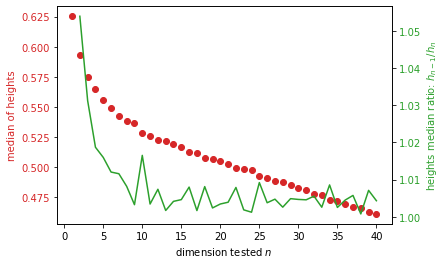

In [3]:
### Importance of dimension correction in higher dimension - Fig.4(B) dimensionality inference

# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    # print("dim", start_dim+i-1, "ratio is:", h_meds[i-1]/h_meds[i], h_meds[i-1], h_meds[i])
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

# plot the height scatterplot and the ratios

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(r'dimension tested $n$')
ax1.set_ylabel(r'median of heights', color = color)
ax1.scatter(list(range(start_dim, end_dim+1)), h_meds, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()
 
color = 'tab:green'
ax2.set_ylabel(r'heights median ratio: $h_{n-1}/h_n$', color = color)
ax2.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Show plot
plt.show()

In [3]:
with open("./datasets/cells.txt") as cells_file:
    cells = cells_file.read().split('\n\n')
# for i in range(len(cells)):

#     line = cells[i].split(" ")
#     print(line)
#     if line == '':
#         continue
#     line = [float(x) for x in line]

print(cells)
# print(np.array(cells).shape)

In [5]:
nb_cells = 3

cells = np.array(cells)
print(len(cells[0]))
dunn_control_indexes = np.loadtxt("datasets/dunn_control_indexes.txt")
dunn_control_indexes = [int(x) for x in dunn_control_indexes]
print(dunn_control_indexes)
dunn_control_cells = cells[dunn_control_indexes,:,:]

# fig = plt.figure(figsize=(15, 8))

for i in outlier_indices:
    cell = dunn_control_cells[i]
    # fig.add_subplot(2, nb_cells, i + 1)
    plt.plot(cell[:, 0], cell[:, 1], color = "red")
    # if i == nb_cells//2:
    #     plt.title("Outliers")
    plt.axis('equal')
    plt.axis('off')
    
for i in range(0,5):
    cell = dunn_control_cells[i]
    # fig.add_subplot(2, nb_cells, i + nb_cells + 1)
    plt.plot(cell[:, 0], cell[:, 1], color = "blue")
    # if i == nb_cells//2:
    #     plt.title("Normal dunn control cells")
    plt.axis('equal')
    plt.axis('off')

1943
[114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed